### IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

### READING THE FACEBOOK METRICS DATASET

In [2]:
df = pd.read_csv("/kaggle/input/facebook-metrics-dataset-of-cosmetic-brand/Facebook Metrics of Cosmetic Brand.csv")

### DATA PRE-PROCESSING

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 20 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Unnamed: 0                                                           500 non-null    int64  
 1   Page total likes                                                     500 non-null    int64  
 2   Type                                                                 500 non-null    object 
 3   Category                                                             500 non-null    int64  
 4   Post Month                                                           500 non-null    int64  
 5   Post Weekday                                                         500 non-null    int64  
 6   Post Hour                                                            500 non-null    int64  
 7   Paid    

In [4]:
df.isnull().sum()

Unnamed: 0                                                             0
Page total likes                                                       0
Type                                                                   0
Category                                                               0
Post Month                                                             0
Post Weekday                                                           0
Post Hour                                                              0
Paid                                                                   1
Lifetime Post Total Reach                                              0
Lifetime Post Total Impressions                                        0
Lifetime Engaged Users                                                 0
Lifetime Post Consumers                                                0
Lifetime Post Consumptions                                             0
Lifetime Post Impressions by people who have liked 

In [5]:
df.head()

,Unnamed: 0,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


In [6]:
df = df.drop(columns=['Unnamed: 0'])

In [7]:
df = df.dropna()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 495 entries, 0 to 498
Data columns (total 19 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Page total likes                                                     495 non-null    int64  
 1   Type                                                                 495 non-null    object 
 2   Category                                                             495 non-null    int64  
 3   Post Month                                                           495 non-null    int64  
 4   Post Weekday                                                         495 non-null    int64  
 5   Post Hour                                                            495 non-null    int64  
 6   Paid                                                                 495 non-null    float64
 7   Lifetime Post

In [9]:
label_encoder = LabelEncoder()
df['Type'] = label_encoder.fit_transform(df['Type'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 495 entries, 0 to 498
Data columns (total 19 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Page total likes                                                     495 non-null    int64  
 1   Type                                                                 495 non-null    int64  
 2   Category                                                             495 non-null    int64  
 3   Post Month                                                           495 non-null    int64  
 4   Post Weekday                                                         495 non-null    int64  
 5   Post Hour                                                            495 non-null    int64  
 6   Paid                                                                 495 non-null    float64
 7   Lifetime Post

### EXPLORATORY DATA ANALYSIS (EDA)

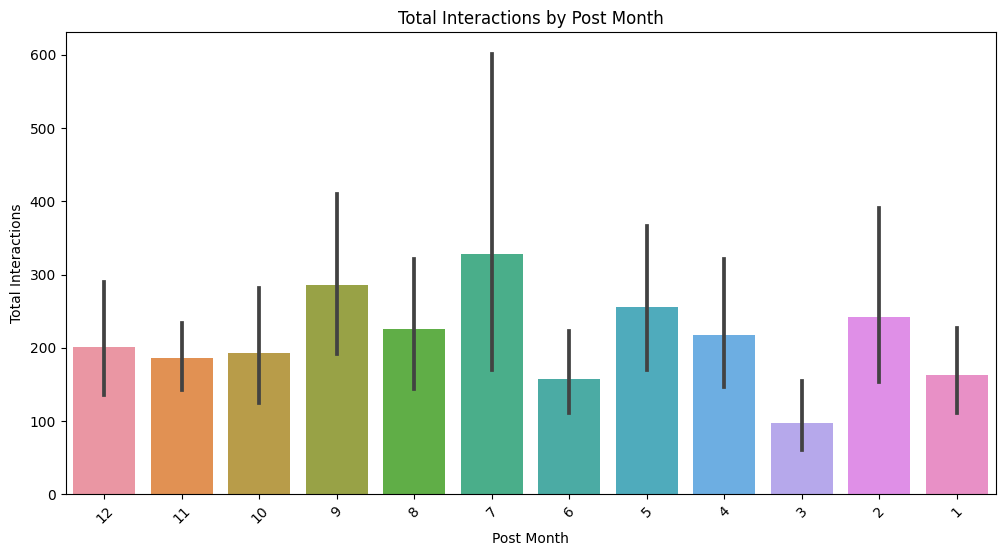

In [11]:
df['Post Month'] = df['Post Month'].astype(str)
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Post Month', y='Total Interactions')
plt.xticks(rotation=45)
plt.title('Total Interactions by Post Month')
plt.show()

# 1 - January, 2 - February, ... 12 - December

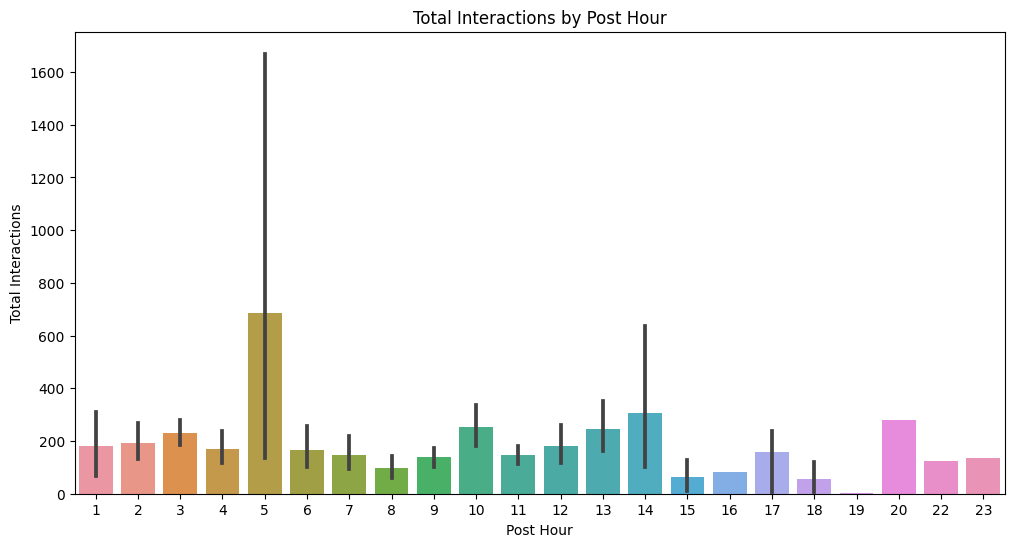

In [12]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Post Hour', y='Total Interactions') 
plt.title('Total Interactions by Post Hour')
plt.show()

# Hour of the day is in 24-hour format

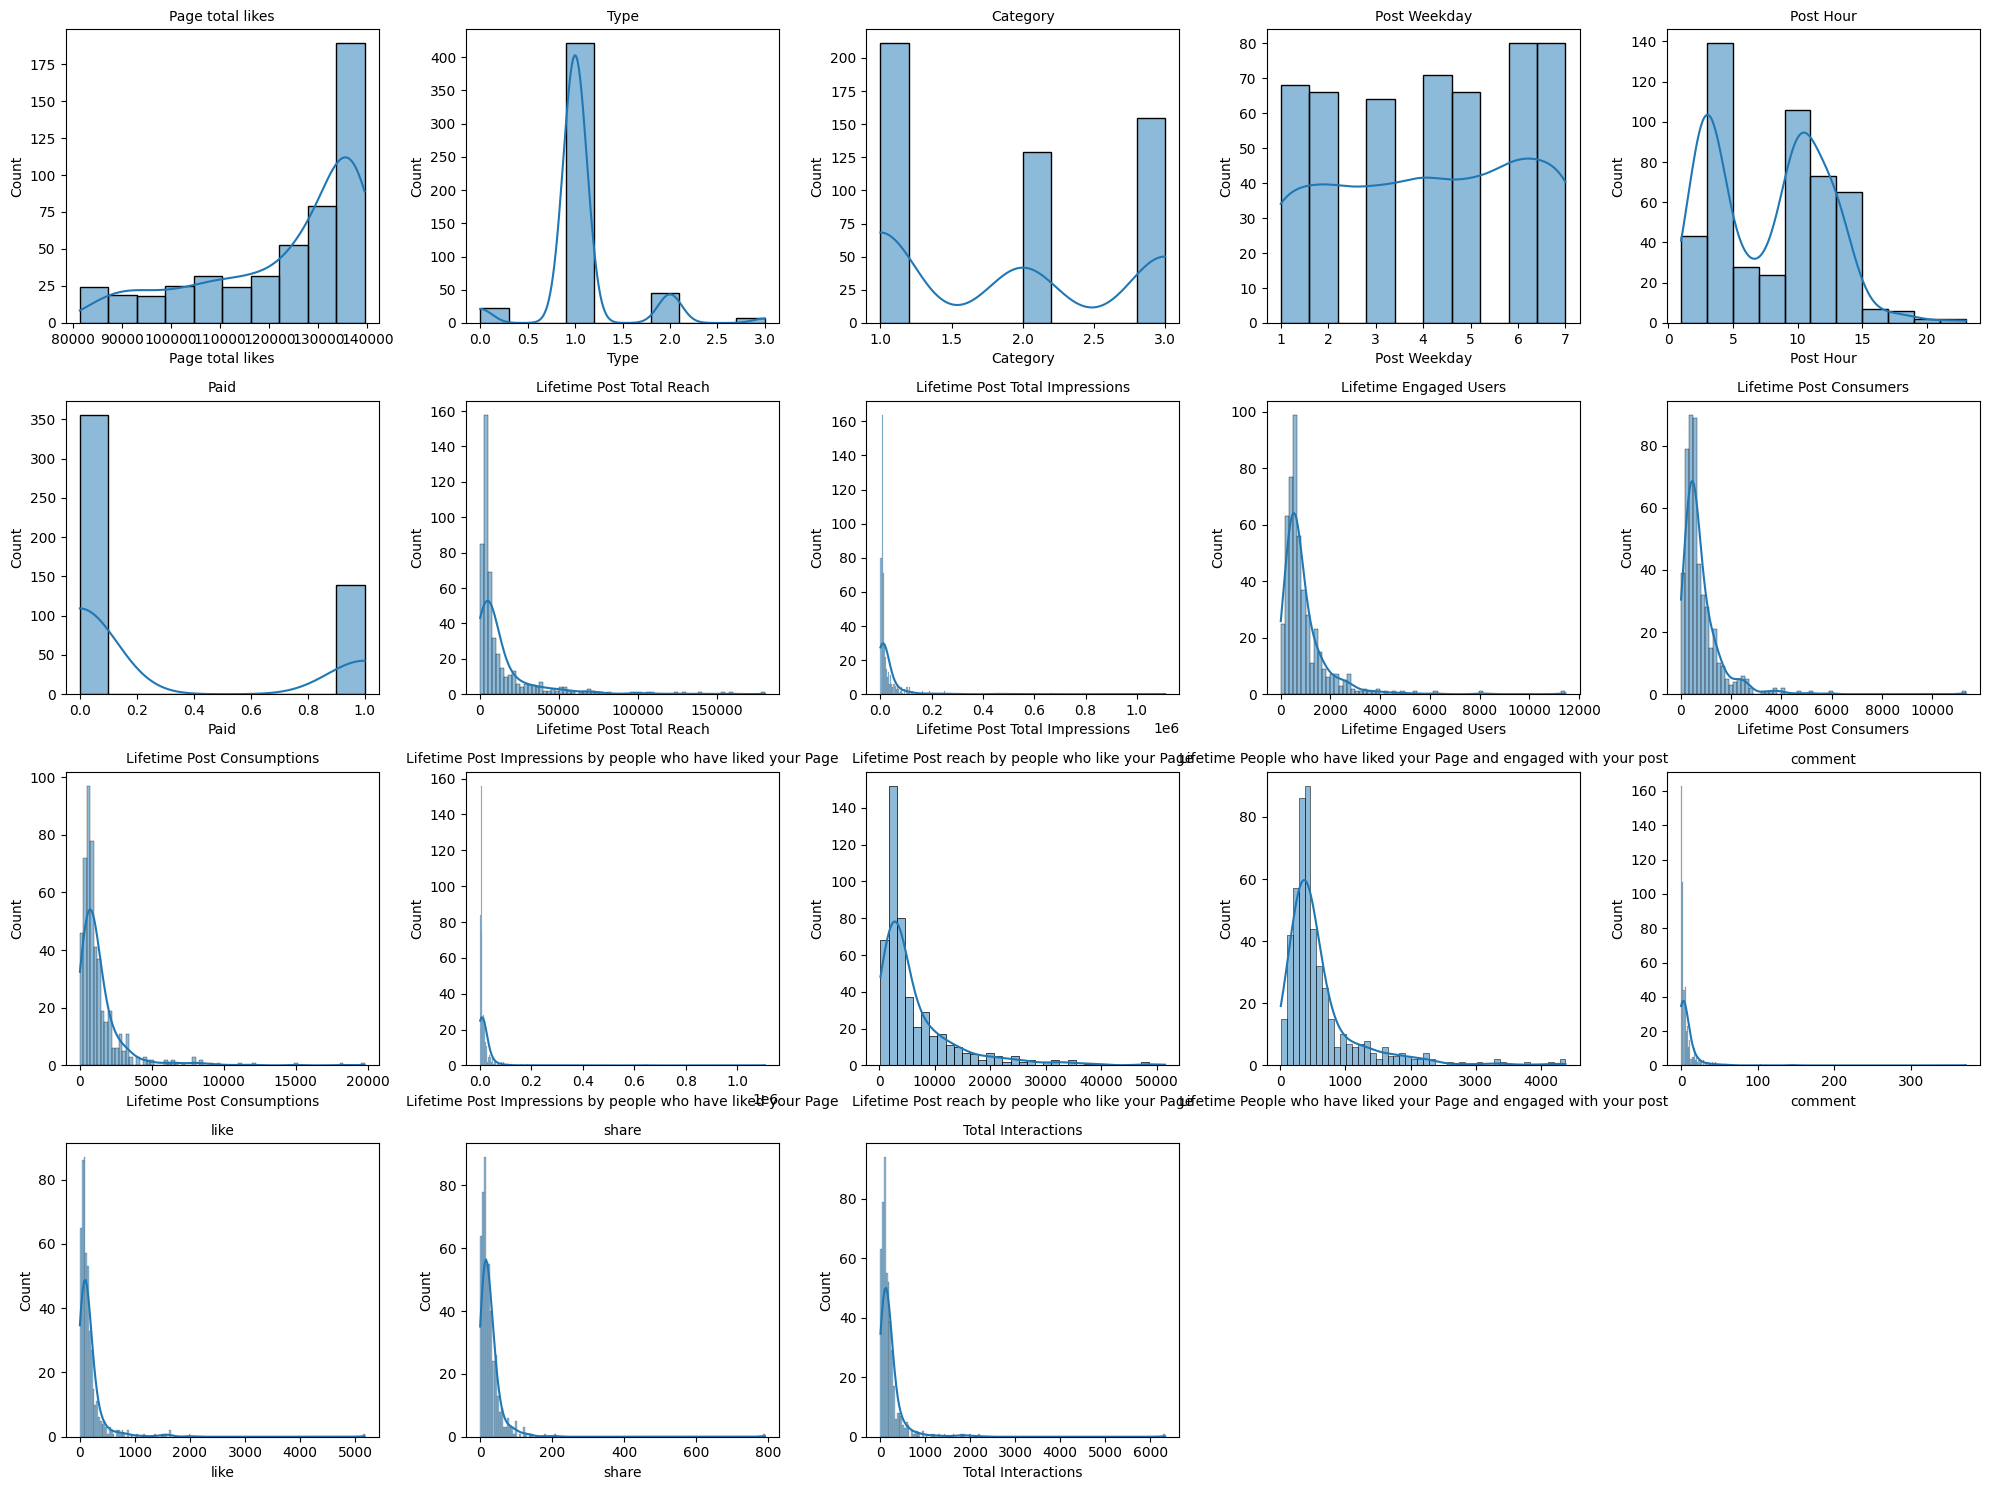

In [13]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(20, 15))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(4, 5, i)
    sns.histplot(df[feature], kde=True)
    plt.title(feature, fontsize=10)

plt.tight_layout()
plt.show()

#### CORRELATION HEATMAP

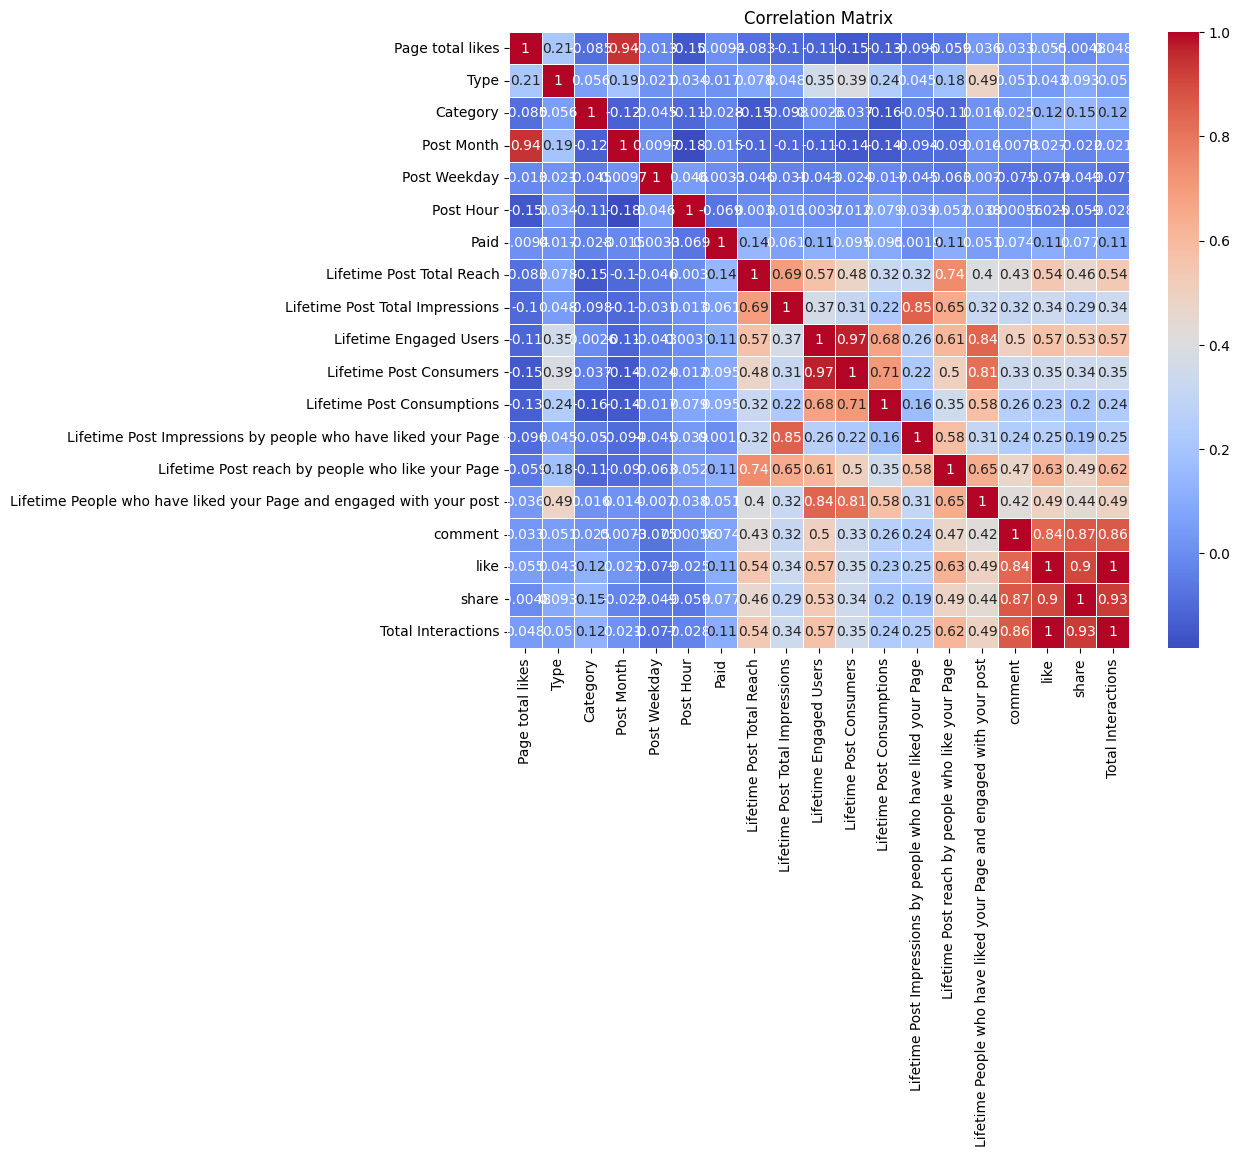

In [14]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

#### REMOVING SOME FEATURES THAT HAVE HIGH CORRELATION WITH OTHERS TO AVOID REDUNDANCY

In [15]:
df = df.drop(columns=['Total Interactions','Lifetime Post Consumers','share',
                     'Lifetime Post Impressions by people who have liked your Page',
                      'Lifetime Post reach by people who like your Page'
                     ])

### STANDARDIZING THE DATA

In [16]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(df)
df = pd.DataFrame(features_scaled, columns=df.columns)

### DETERMINING OPTIMUM VALUE OF NUMBER OF CLUSTERS USING ELBOW METHOD

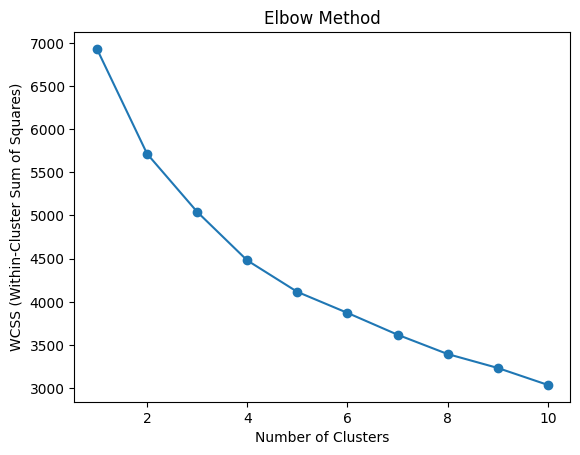

In [17]:
wcss = []
for i in range(1, 11):  # Testing k from 1 to 10
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method')
plt.show()


### PRINCIPAL COMPONENT ANALYSIS FOR DIMENSIONALITY REDUCTION, FOLLOWED BY CLUSTERING USING KMEANS

Silhouette Score: 0.4794145075529073
Davies-Bouldin Score: 0.7306795569830168


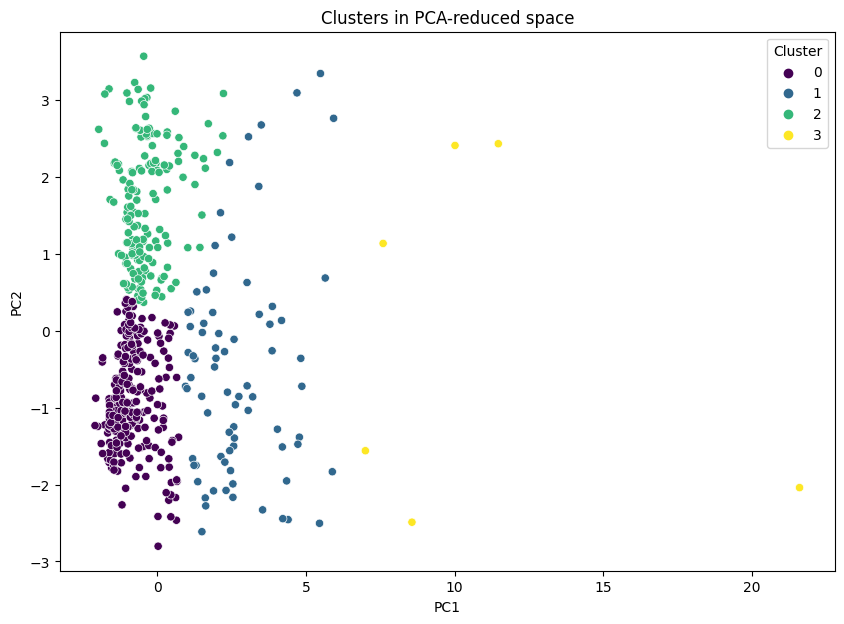

In [18]:
pca = PCA(n_components=2)
pca_features = pca.fit_transform(df)
pca_df = pd.DataFrame(pca_features, columns=['PC1', 'PC2'])

optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
kmeans.fit(pca_df)

pca_df['Cluster'] = kmeans.labels_

silhouette_avg = silhouette_score(pca_df[['PC1', 'PC2']], kmeans.labels_)
db_score = davies_bouldin_score(pca_df[['PC1', 'PC2']], kmeans.labels_)
print(f'Silhouette Score: {silhouette_avg}')
print(f'Davies-Bouldin Score: {db_score}')

plt.figure(figsize=(10, 7))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='viridis', marker='o')
plt.title('Clusters in PCA-reduced space')
plt.show()


In [19]:
df.shape

(495, 14)

### DETECTION AND HANDLING OF OUTLIERS

In [20]:
from scipy.spatial.distance import cdist
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(df)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Calculate distances from each point to its cluster centroid
distances = cdist(df, centroids, 'euclidean')
min_distances = np.min(distances, axis=1)

# Define a threshold for outlier detection
# For example, points with distance greater than a certain percentile of distances
threshold = np.percentile(min_distances, 95)  # Top 5% are considered outliers

# Identify outliers
outliers = min_distances > threshold

print(f"Outlier threshold distance: {threshold}")
print(f"Number of outliers detected: {np.sum(outliers)}")

outlier_indices = np.where(outliers)[0]
print("Indices of outliers:", outlier_indices)

df['Cluster'] = labels
df['DistanceToCentroid'] = min_distances
df['IsOutlier'] = outliers

Outlier threshold distance: 4.89034550969082
Number of outliers detected: 25
Indices of outliers: [  3  10  29  38  42  55  71 137 139 164 168 264 273 274 284 345 375 376
 411 423 433 442 456 459 460]


In [21]:
df = df[~df['IsOutlier']]
df.shape

(470, 17)

### KMEANS CLUSTERING AFTER REMOVING OUTLIERS

Silhouette Score: 0.6025302782858831
Davies-Bouldin Score: 0.4562201595493198


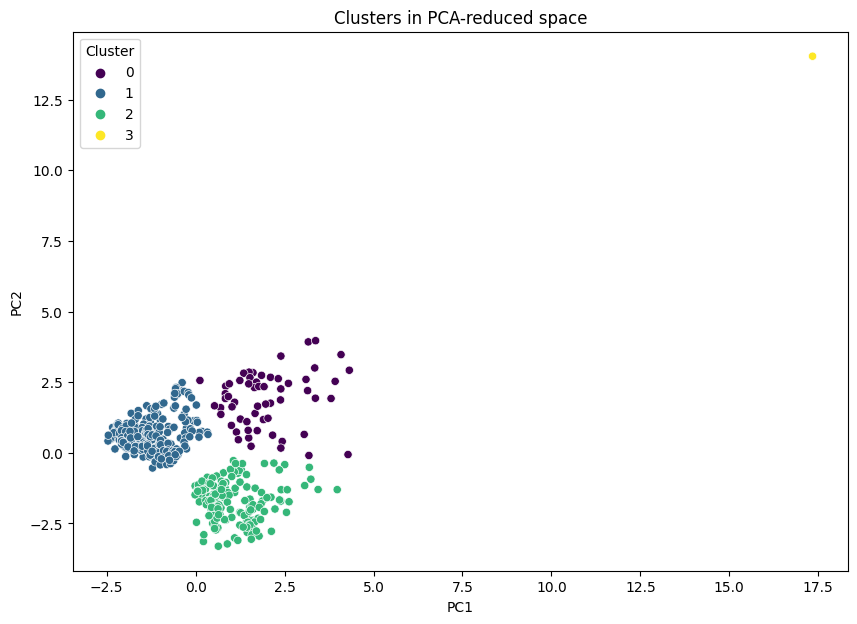

In [22]:
pca = PCA(n_components=2)
pca_features = pca.fit_transform(df)
pca_df = pd.DataFrame(pca_features, columns=['PC1', 'PC2'])

optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
kmeans.fit(pca_df)

pca_df['Cluster'] = kmeans.labels_

silhouette_avg = silhouette_score(pca_df[['PC1', 'PC2']], kmeans.labels_)
db_score = davies_bouldin_score(pca_df[['PC1', 'PC2']], kmeans.labels_)
print(f'Silhouette Score: {silhouette_avg}')
print(f'Davies-Bouldin Score: {db_score}')

plt.figure(figsize=(10, 7))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='viridis', marker='o')
plt.title('Clusters in PCA-reduced space')
plt.show()
